# Air Quality Index (AQI) Analysis

## 1. Introduction
This notebook analyzes the Air Quality Index (AQI) dataset for major Indian cities to identify trends, patterns, and insights into air quality variations.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('AQI_Data_Cleaned.csv')

# Display the first few rows of the dataframe
df.head()

,Date,City,AQI,AQI_Bucket,Year,Month,Day,Global_AQI_Bucket
0,2017-01-01,Bengaluru,84.0,Satisfactory,2017,1,1,Unhealthy
1,2017-01-02,Bengaluru,74.0,Satisfactory,2017,1,2,Unhealthy
2,2017-01-03,Bengaluru,69.0,Satisfactory,2017,1,3,Unhealthy
3,2017-01-04,Bengaluru,71.0,Satisfactory,2017,1,4,Unhealthy
4,2017-01-05,Bengaluru,74.0,Satisfactory,2017,1,5,Unhealthy


## 2. Data Understanding
Let's get a basic understanding of the dataset.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12661 entries, 0 to 12660
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               12661 non-null  object 
 1   City               12661 non-null  object 
 2   AQI                12661 non-null  float64
 3   AQI_Bucket         12661 non-null  object 
 4   Year               12661 non-null  int64  
 5   Month              12661 non-null  int64  
 6   Day                12661 non-null  int64  
 7   Global_AQI_Bucket  12661 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 791.4+ KB


In [3]:
df.describe()

,AQI,Year,Month,Day
count,12661.000000,12661.000000,12661.000000,12661.000000
mean,109.283390,2020.890609,6.529579,15.760051
std,83.036533,2.222808,3.488349,8.799796
min,10.000000,2017.000000,1.000000,1.000000
25%,56.000000,2019.000000,3.000000,8.000000
50%,79.000000,2021.000000,7.000000,16.000000
75%,132.000000,2023.000000,10.000000,23.000000
max,494.000000,2025.000000,12.000000,31.000000


## 3. Descriptive Statistics

In [4]:
# Overall summary statistics
print('Overall AQI Summary:')
print(df['AQI'].describe())

Overall AQI Summary:
count    12661.000000
mean       109.283390
std         83.036533
min         10.000000
25%         56.000000
50%         79.000000
75%        132.000000
max        494.000000
Name: AQI, dtype: float64


In [5]:
# City-wise summary statistics
print('\nCity-wise AQI Summary:')
print(df.groupby('City')['AQI'].describe())


City-wise AQI Summary:
            count        mean         std   min    25%    50%    75%    max
City                                                                       
Bengaluru  2857.0   73.497725   24.927488  24.0   54.0   68.0   90.0  144.0
Chennai    2643.0   76.038782   26.163441  24.0   57.0   69.0   90.0  139.5
Delhi      2889.0  210.781239  104.907190  41.0  119.0  198.0  290.0  494.0
Madikeri   1431.0   41.002096   17.489067  10.0   28.0   37.0   51.0   85.5
Mumbai     2841.0  107.378564   54.589410  25.0   63.0   92.0  146.0  270.5


## 4. Time Series Analysis

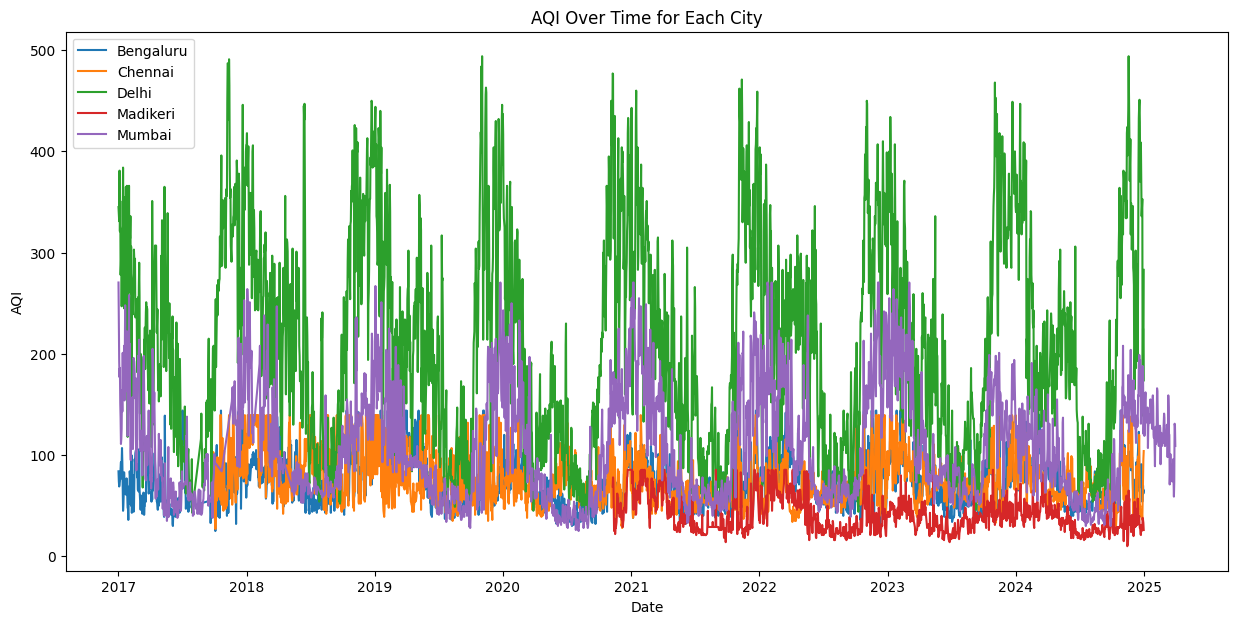

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
plt.figure(figsize=(15, 7))
for city in df['City'].unique():
    city_df = df[df['City'] == city]
    plt.plot(city_df['Date'], city_df['AQI'], label=city)
plt.title('AQI Over Time for Each City')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend()
plt.show()

## 5. Comparative Analysis

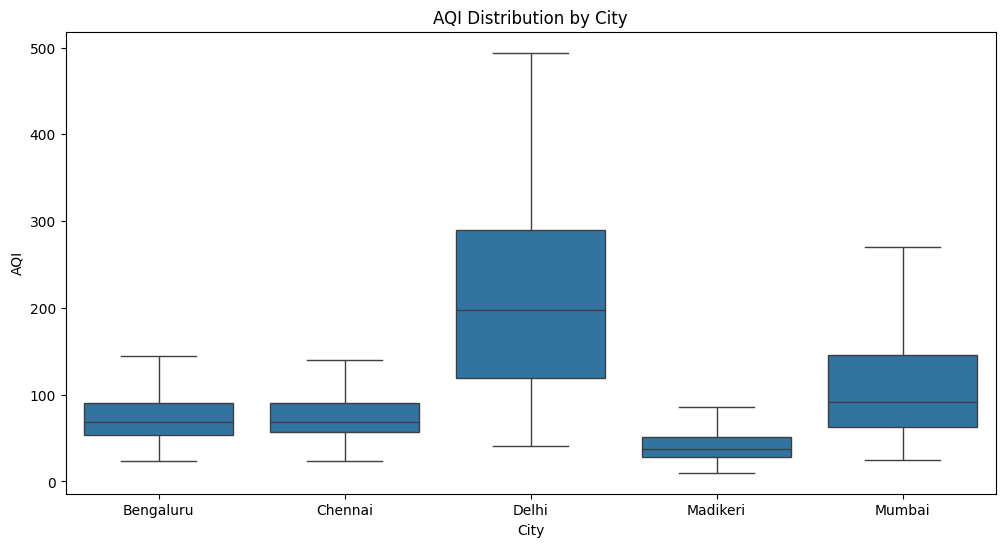

In [7]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='City', y='AQI', data=df)
plt.title('AQI Distribution by City')
plt.xlabel('City')
plt.ylabel('AQI')
plt.show()

## 6. Data Visualization

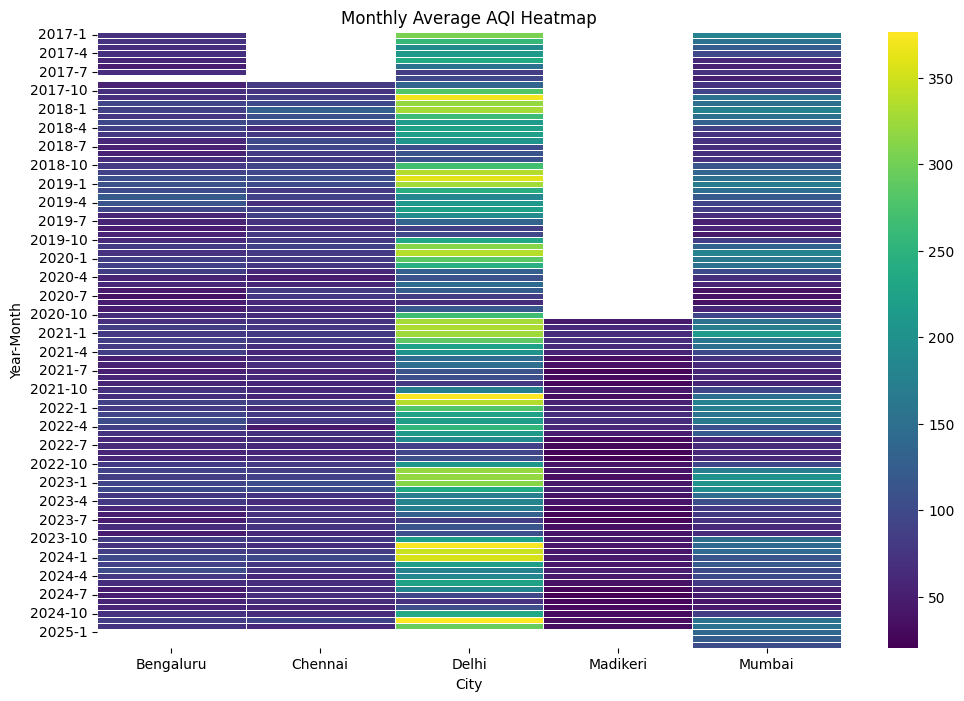

In [8]:
# Monthly average AQI heatmap
monthly_aqi = df.groupby(['Year', 'Month', 'City'])['AQI'].mean().unstack()
plt.figure(figsize=(12, 8))
sns.heatmap(monthly_aqi, cmap='viridis', linewidths=.5)
plt.title('Monthly Average AQI Heatmap')
plt.xlabel('City')
plt.ylabel('Year-Month')
plt.show()

### 7. Seasonal Decomposition

This analysis will help us understand the underlying patterns in the AQI data by separating it into trend, seasonal, and residual components.




In [9]:
!pip install statsmodels


You should consider upgrading via the 'C:\Users\sejal\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


--- Processing Seasonal Decomposition for Bengaluru ---


C:\Users\sejal\AppData\Local\Temp\ipykernel_15564\4163072392.py:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_aqi = city_df['AQI'].resample('M').mean().dropna()


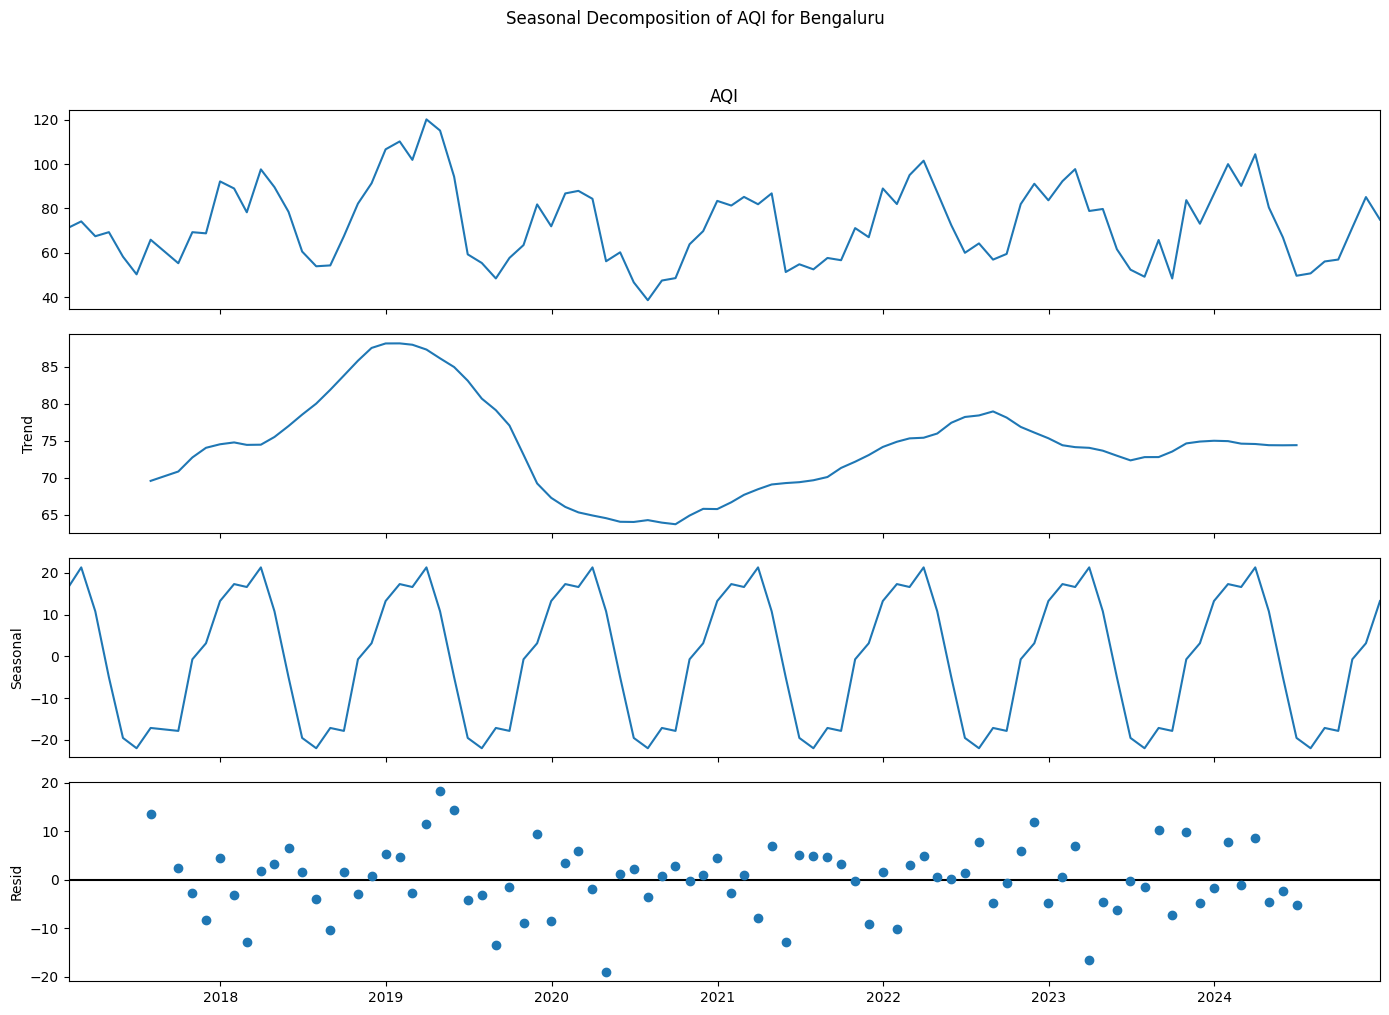

--- Processing Seasonal Decomposition for Mumbai ---


C:\Users\sejal\AppData\Local\Temp\ipykernel_15564\4163072392.py:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_aqi = city_df['AQI'].resample('M').mean().dropna()


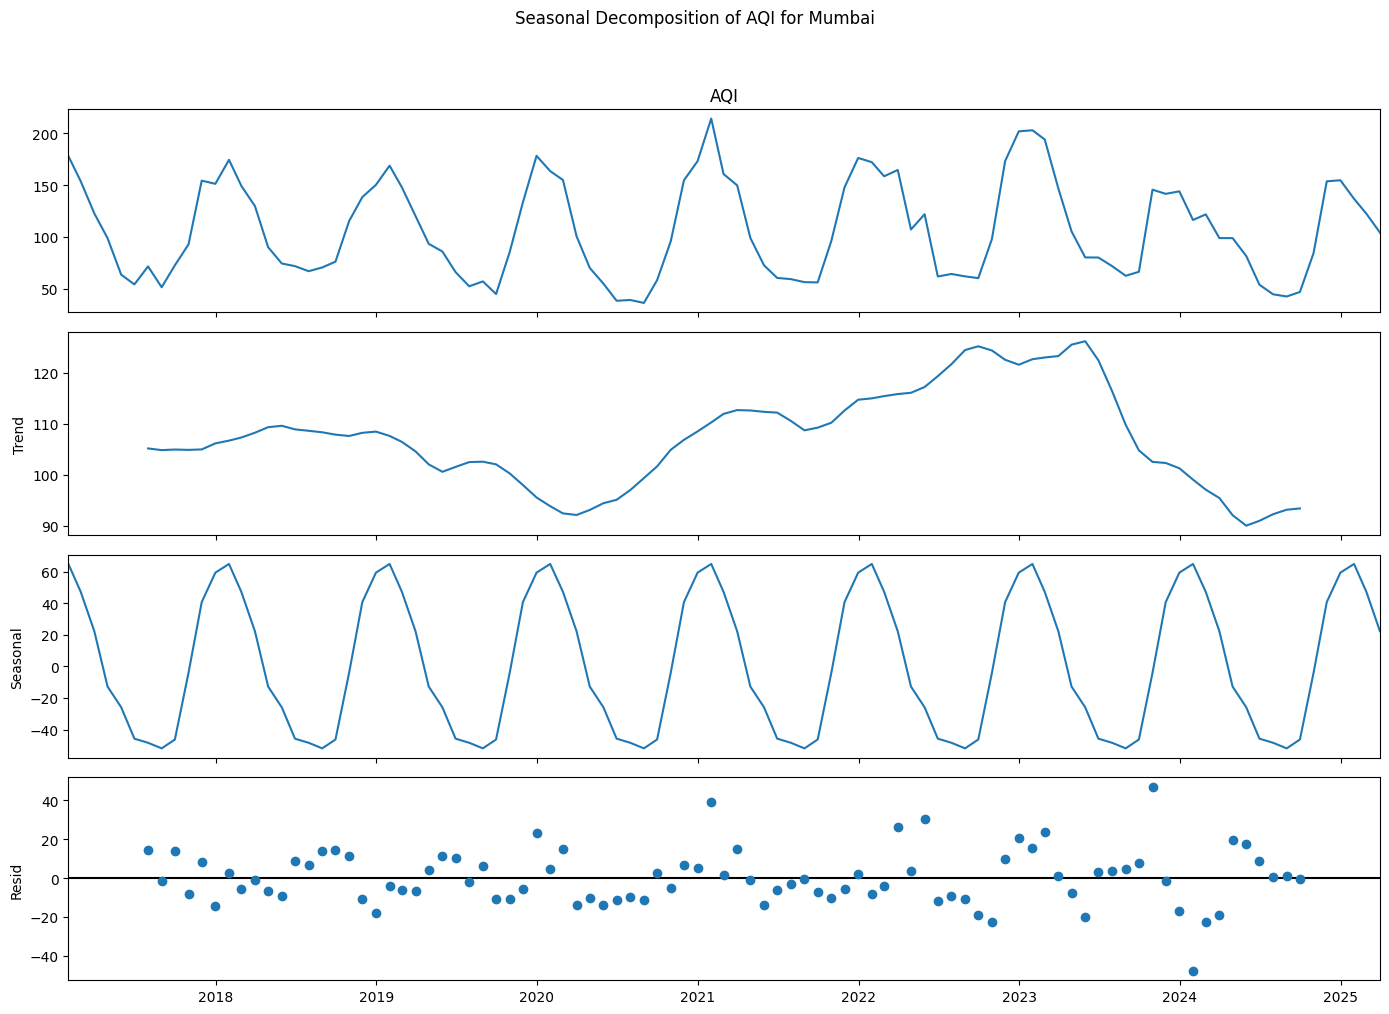

--- Processing Seasonal Decomposition for Delhi ---


C:\Users\sejal\AppData\Local\Temp\ipykernel_15564\4163072392.py:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_aqi = city_df['AQI'].resample('M').mean().dropna()


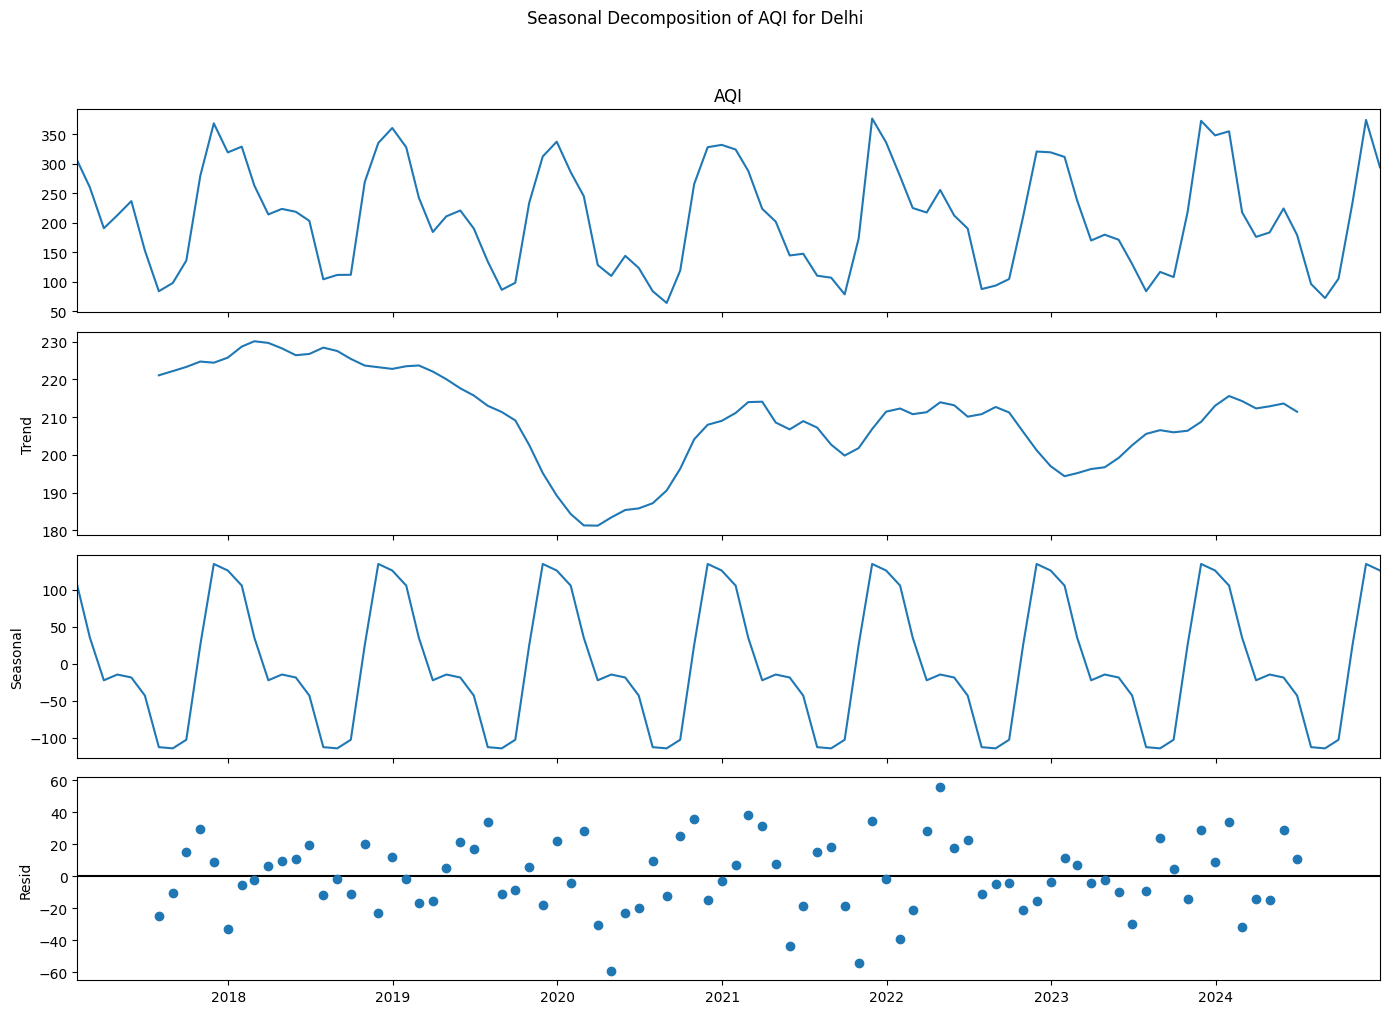

--- Processing Seasonal Decomposition for Chennai ---


C:\Users\sejal\AppData\Local\Temp\ipykernel_15564\4163072392.py:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_aqi = city_df['AQI'].resample('M').mean().dropna()


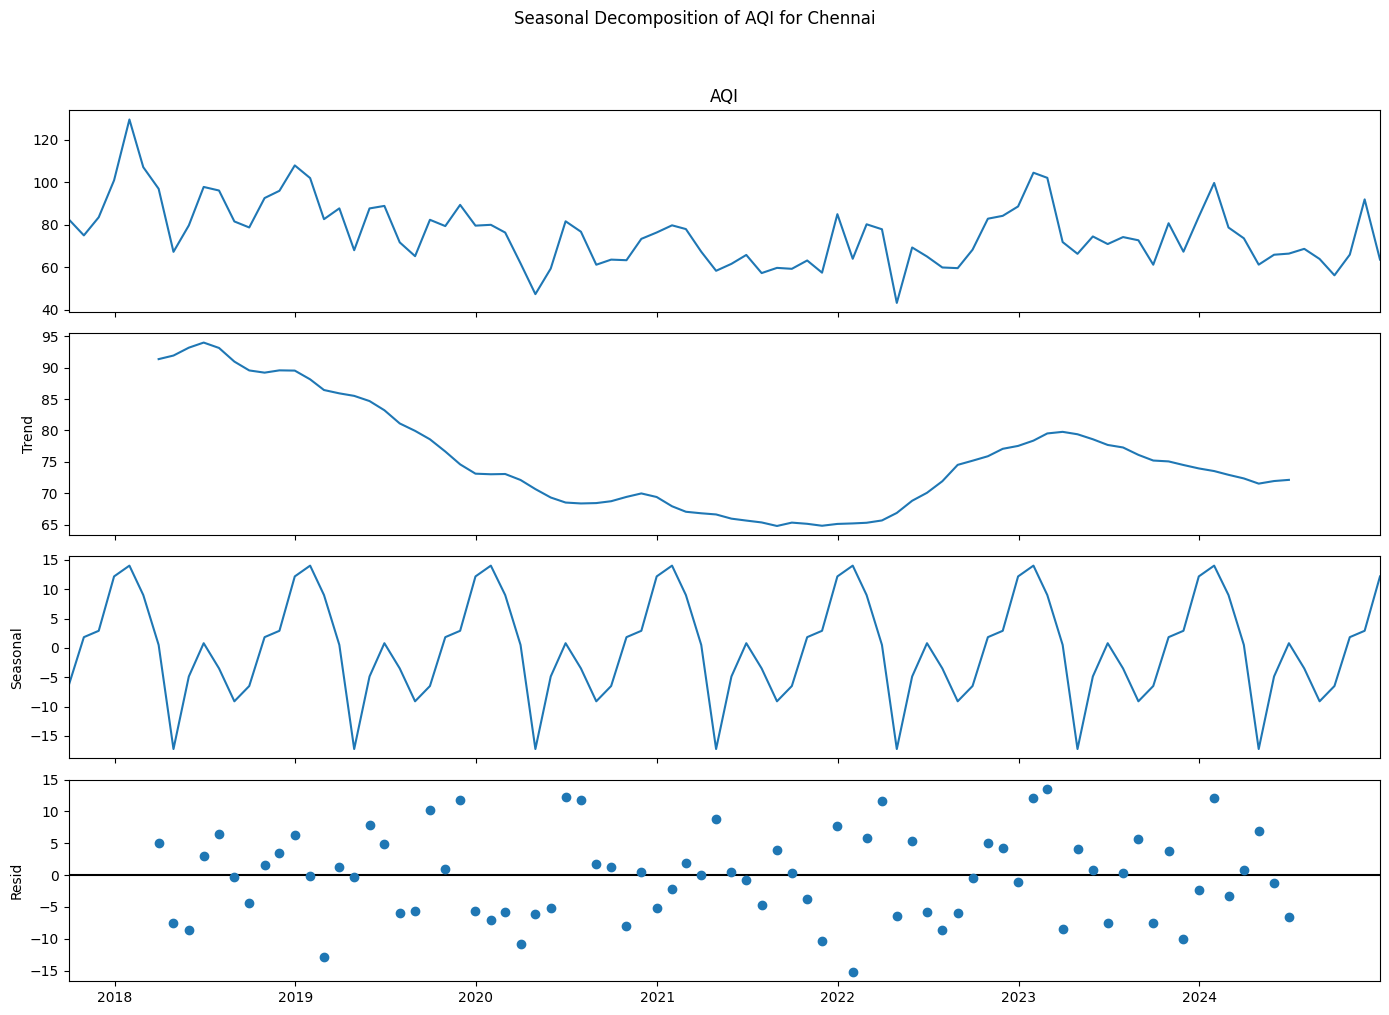

--- Processing Seasonal Decomposition for Madikeri ---


C:\Users\sejal\AppData\Local\Temp\ipykernel_15564\4163072392.py:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_aqi = city_df['AQI'].resample('M').mean().dropna()


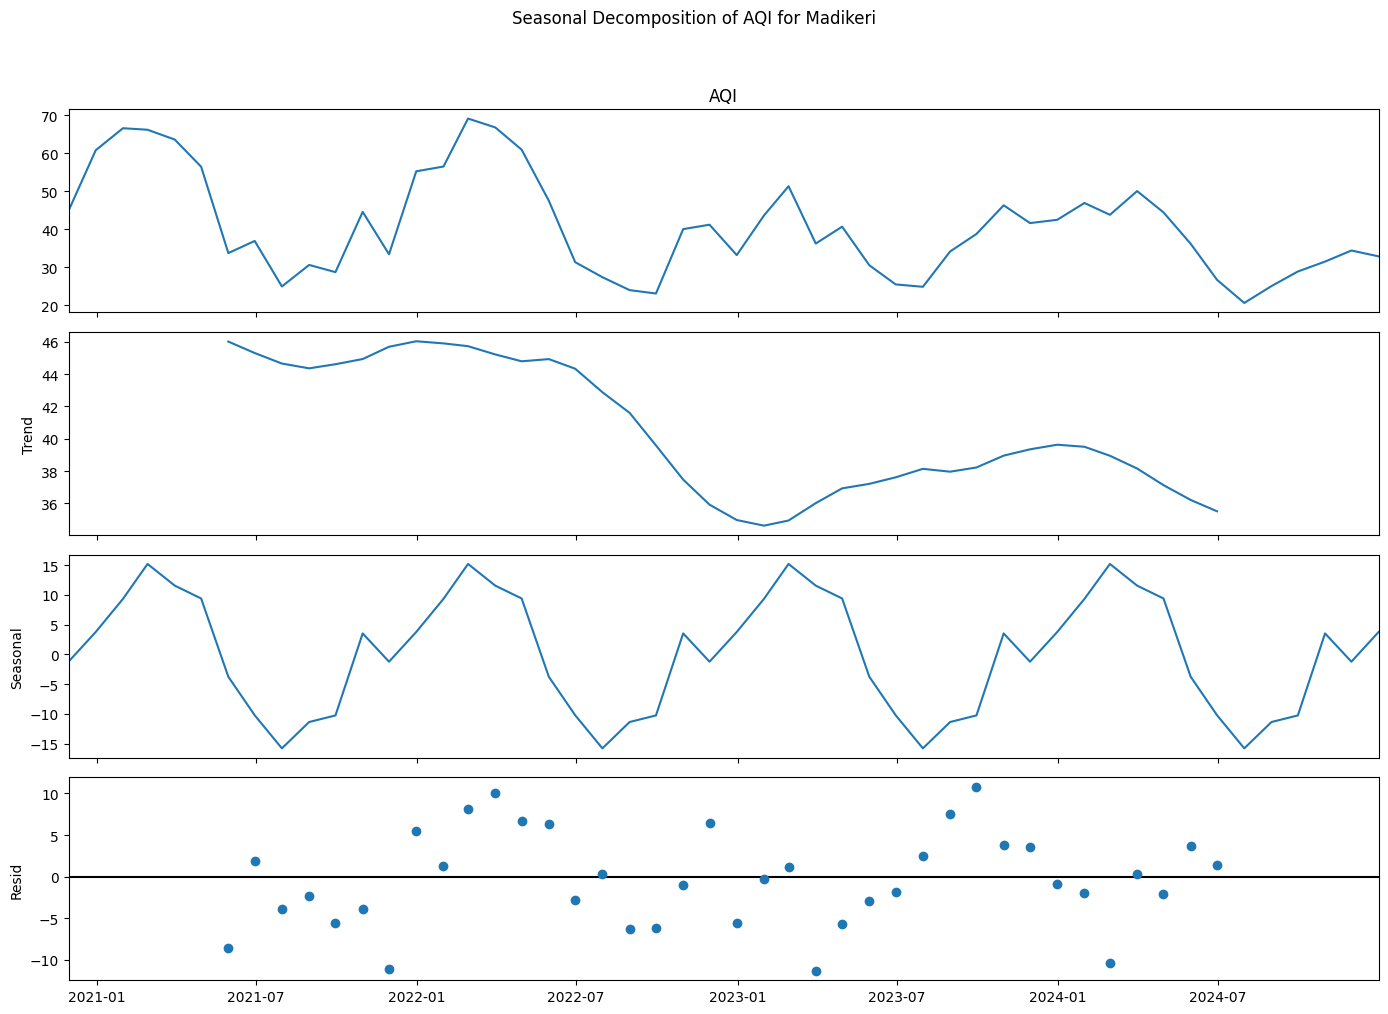

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings

# Suppress warnings to keep the output clean
warnings.filterwarnings("ignore", category=UserWarning)

# Ensure the DataFrame is sorted by date
df.sort_values('Date', inplace=True)

# Set 'Date' as the index for time series operations
df_indexed = df.set_index('Date')

# Perform seasonal decomposition for each city
for city in df['City'].unique():
    print(f"--- Processing Seasonal Decomposition for {city} ---")
    city_df = df_indexed[df_indexed['City'] == city]
    
    # Resample to monthly frequency, taking the mean AQI for each month
    # This helps to create a regular time series and handle missing days
    monthly_aqi = city_df['AQI'].resample('M').mean().dropna()
    
    # Check if there is enough data (at least 24 months for yearly seasonality)
    if len(monthly_aqi) >= 24:
        try:
            # Perform decomposition
            decomposition = seasonal_decompose(monthly_aqi, model='additive', period=12) # Explicitly set period to 12 for yearly seasonality
            
            # Plot the results
            fig = decomposition.plot()
            fig.set_size_inches(14, 10)
            plt.suptitle(f'Seasonal Decomposition of AQI for {city}', y=1.01)
            plt.tight_layout(rect=[0, 0, 1, 0.98])
            plt.show()
            
        except Exception as e:
            print(f"Could not perform decomposition for {city}. Error: {e}")
    else:
        print(f"Skipping seasonal decomposition for {city} due to insufficient data (found {len(monthly_aqi)} months, require at least 24).")

### 8. Rolling Averages

This will smooth out short-term fluctuations and highlight the longer-term trends in AQI.


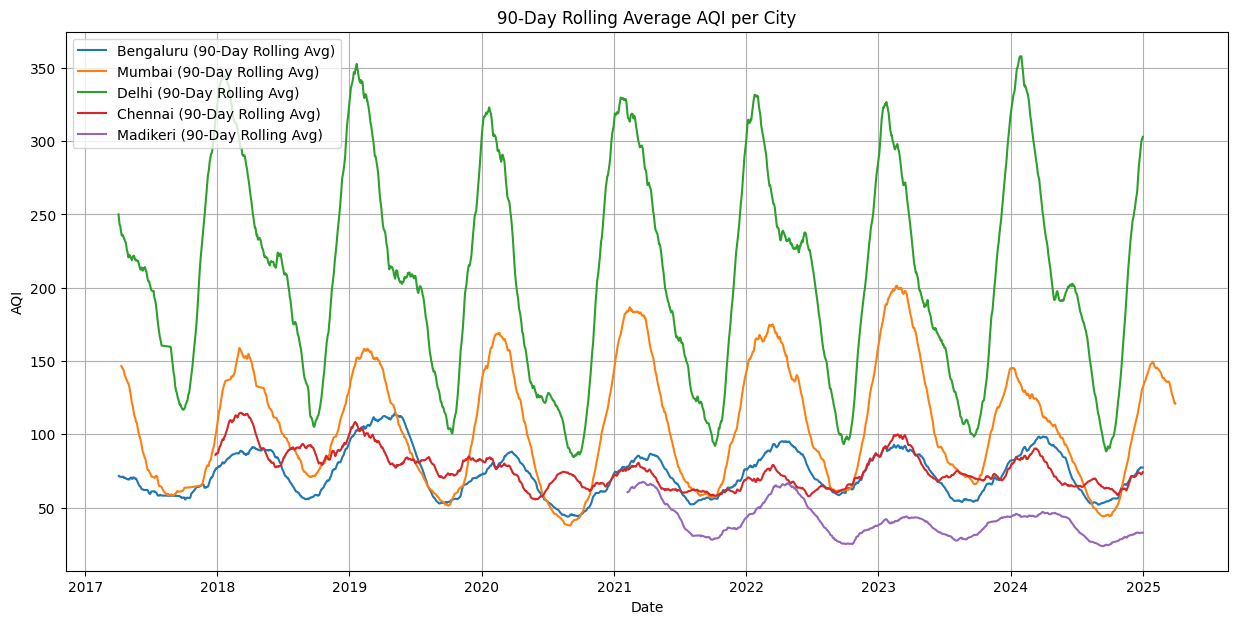

In [11]:
# Calculate and plot 90-day rolling average for each city
plt.figure(figsize=(15, 7))

for city in df['City'].unique():
    city_df = df[df['City'] == city].copy()
    city_df.set_index('Date', inplace=True)
    city_df['AQI_90_Day_Rolling'] = city_df['AQI'].rolling(window=90).mean()
    
    plt.plot(city_df.index, city_df['AQI_90_Day_Rolling'], label=f'{city} (90-Day Rolling Avg)')

plt.title('90-Day Rolling Average AQI per City')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend()
plt.grid(True)
plt.show()

### 9. Year-over-Year AQI Comparison

This will allow for a direct comparison of AQI levels across different years


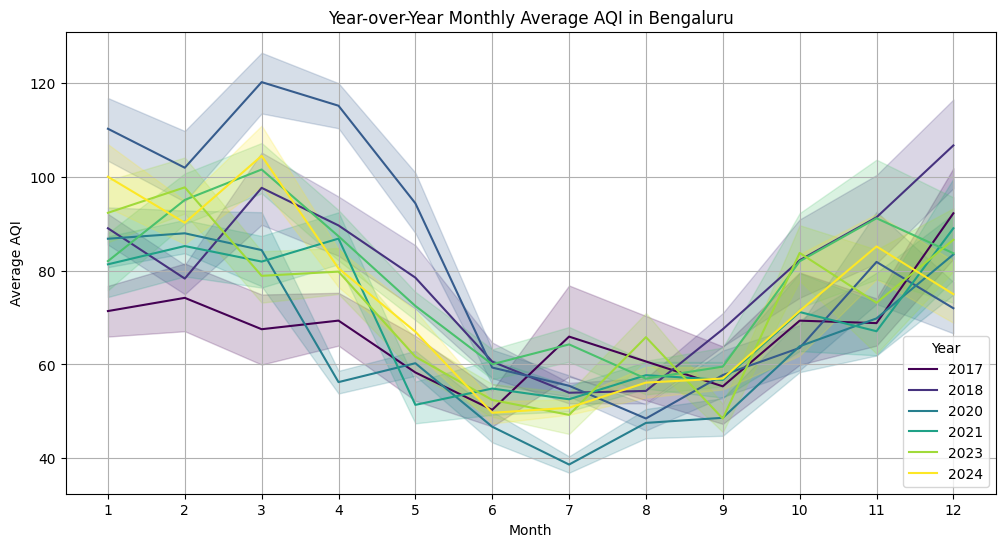

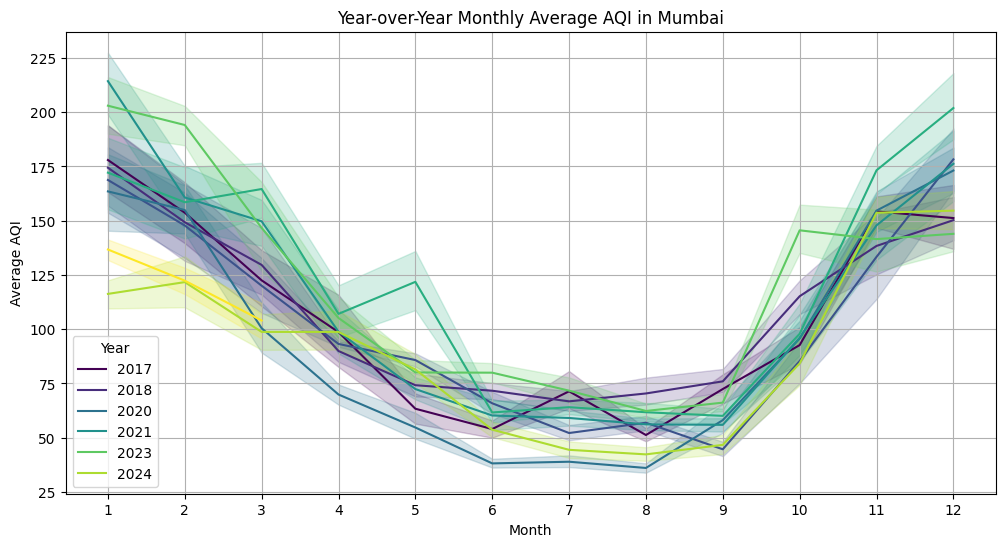

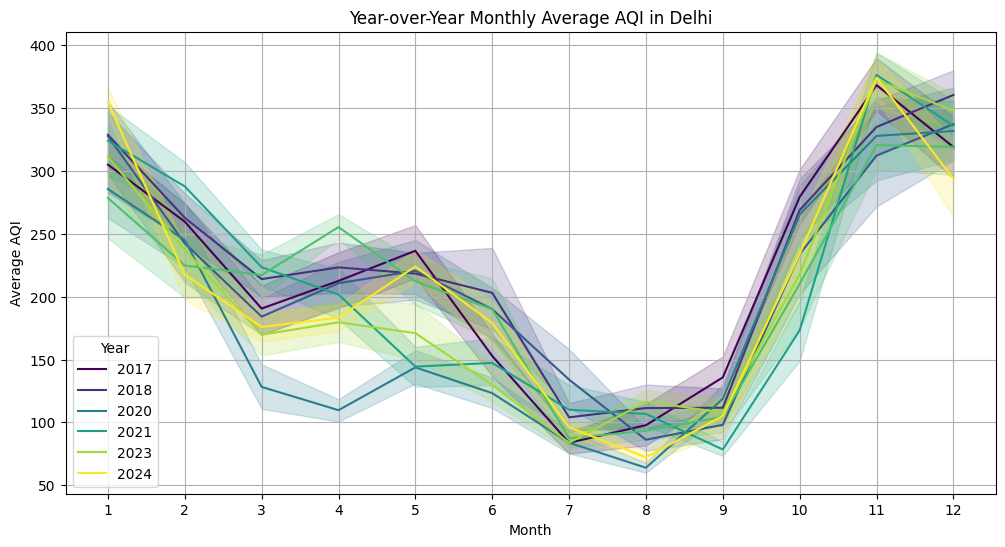

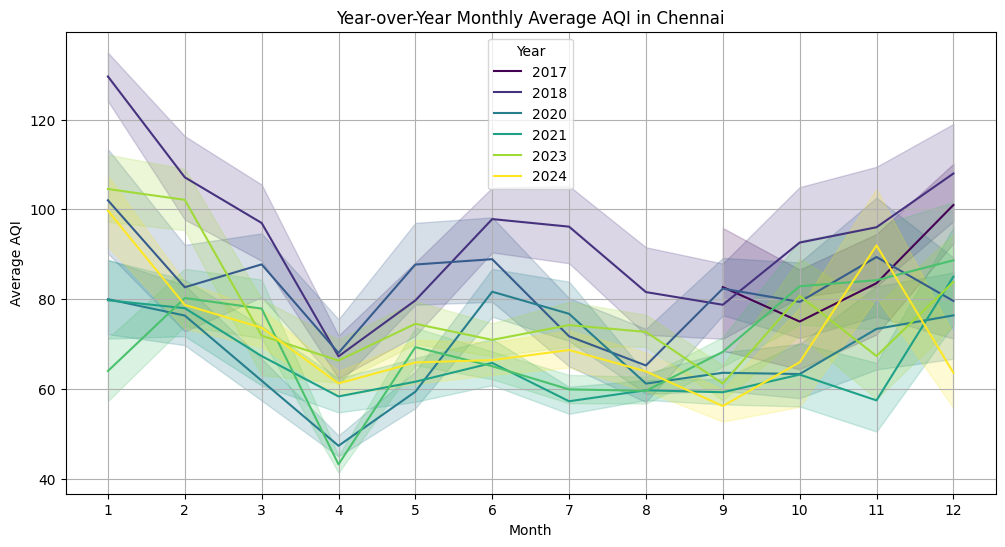

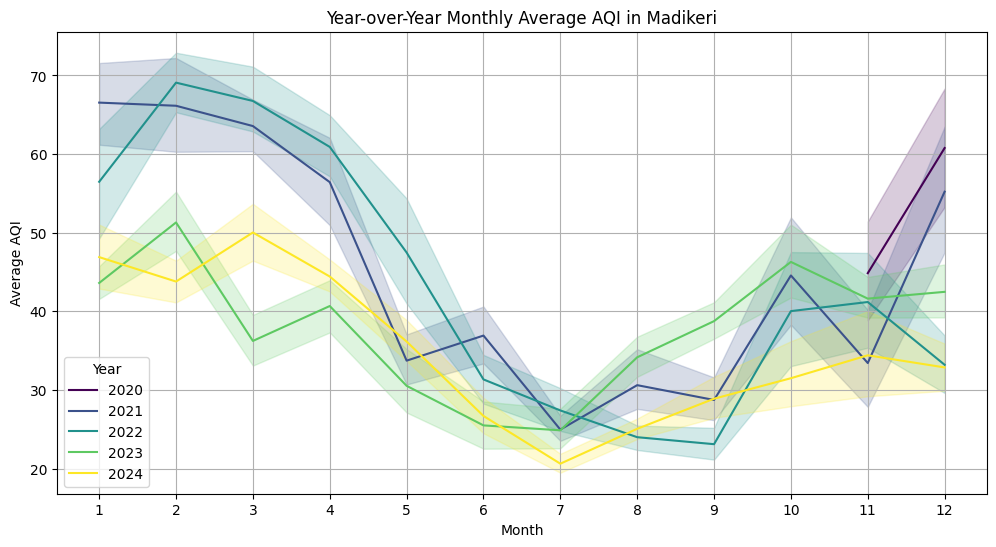

In [12]:
# Create 'Year' and 'Month' columns if they don't exist
if 'Year' not in df.columns:
    df['Year'] = df['Date'].dt.year
if 'Month' not in df.columns:
    df['Month'] = df['Date'].dt.month

# Plot year-over-year comparison for each city
for city in df['City'].unique():
    plt.figure(figsize=(12, 6))
    city_df = df[df['City'] == city]
    
    sns.lineplot(data=city_df, x='Month', y='AQI', hue='Year', palette='viridis')
    
    plt.title(f'Year-over-Year Monthly Average AQI in {city}')
    plt.xlabel('Month')
    plt.ylabel('Average AQI')
    plt.xticks(range(1, 13))
    plt.legend(title='Year')
    plt.grid(True)
    plt.show()

--- Crosstab of Indian AQI vs. Global AQI ---
Global_AQI_Bucket  Good  Moderate  Unhealthy for Sensitive Groups  Unhealthy  \
AQI_Bucket                                                                     
Good                  6       776                            1535          0   
Satisfactory          0         0                             734       5040   
Moderate              0         0                               0       2000   
Poor                  0         0                               0         28   
Very Poor             0         0                               0          0   
Severe                0         0                               0          0   

Global_AQI_Bucket  Very Unhealthy  Hazardous  
AQI_Bucket                                    
Good                            0          0  
Satisfactory                    0          0  
Moderate                      926          0  
Poor                          576        383  
Very Poor                      

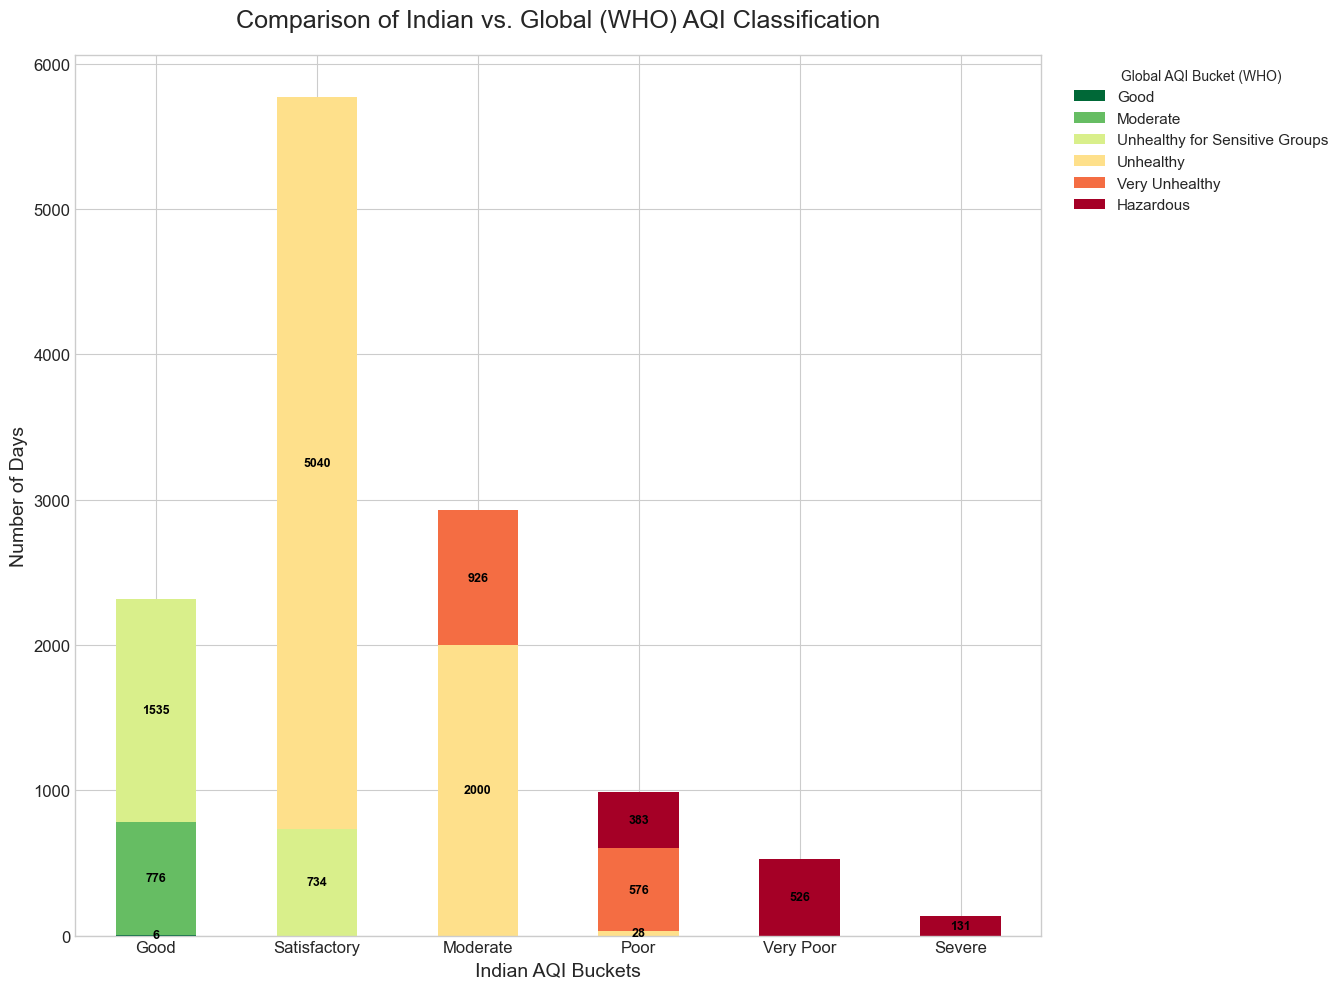

In [14]:

try:
    df = pd.read_csv('AQI_Data_Cleaned.csv')
except FileNotFoundError:
    print("Error: 'AQI_Data_Cleaned.csv' not found. Please make sure the file is in the correct directory.")
    exit()

# --- 2. Create a Cross-Tabulation ---
# A crosstab (or contingency table) is used to analyze the relationship between two categorical variables.
# It shows the frequency with which each combination of categories appears.
crosstab = pd.crosstab(df['AQI_Bucket'], df['Global_AQI_Bucket'])

# --- 3. Define a Logical Order for Buckets ---
# To make the visualization more intuitive, we'll order the buckets from best to worst air quality.
# This ensures the plot follows a logical progression of severity.
aqi_bucket_order = [
    'Good',
    'Satisfactory',
    'Moderate',
    'Poor',
    'Very Poor',
    'Severe'
]

global_aqi_bucket_order = [
    'Good',
    'Moderate',
    'Unhealthy for Sensitive Groups',
    'Unhealthy',
    'Very Unhealthy',
    'Hazardous'
]

# --- 4. Reorder the Crosstab ---
# We apply the defined order to both the rows (index) and columns of our crosstab.
# `reindex` ensures the data is sorted logically.
# `fill_value=0` is used in case a specific category combination doesn't exist in the data.
crosstab = crosstab.reindex(index=aqi_bucket_order, columns=global_aqi_bucket_order, fill_value=0)

# --- 5. Generate the Stacked Bar Chart ---
# A stacked bar chart is excellent for showing how a larger category is divided into smaller sub-categories.
# Here, each bar represents a local (Indian) AQI bucket, and the colored segments show how those same days
# are classified under the stricter global (WHO) standard. This clearly visualizes the difference in standardization.
plt.style.use('seaborn-v0_8-whitegrid')
ax = crosstab.plot(
    kind='bar',
    stacked=True,
    figsize=(16, 10),
    colormap='RdYlGn_r' # A color map that goes from Red (bad) to Green (good)
)

# --- 6. Add Titles and Labels ---
# Add descriptive titles and labels to make the plot easy to understand.
plt.title('Comparison of Indian vs. Global (WHO) AQI Classification', fontsize=18, pad=20)
plt.xlabel('Indian AQI Buckets', fontsize=14)
plt.ylabel('Number of Days', fontsize=14)
plt.xticks(rotation=0, fontsize=12) # Keep x-axis labels horizontal for readability
plt.yticks(fontsize=12)

# Improve the legend
plt.legend(title='Global AQI Bucket (WHO)', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=11)

# --- 7. Add Data Labels ---
# Add labels to the bars to show the count for each segment, making it easier to read exact values.
for container in ax.containers:
    # Create labels, but only if the value is greater than 0
    labels = [int(v) if v > 0 else '' for v in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='center', color='black', fontsize=9, fontweight='bold')

plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make room for the legend

# --- 8. Save and Display the Plot ---
# Save the generated plot as a PNG image file.
plt.savefig('aqi_standards_comparison.png')

# Print the crosstab table to the console for a numerical view.
print("--- Crosstab of Indian AQI vs. Global AQI ---")
print(crosstab)
print("\n--- Plot saved as aqi_standards_comparison.png ---")

# --- 9. Provide a Detailed Analysis of the Visualization ---
ANALYSIS_TEXT = """
Deep Dive Analysis of the AQI Standards Comparison:

This visualization reveals a significant discrepancy between the Indian AQI classification and the stricter Global (WHO) standards. Here are the key takeaways:

1.  Underestimation of Risk at "Good" and "Satisfactory" Levels: A vast majority of days classified as 'Good' or 'Satisfactory' under Indian standards are re-categorized as 'Unhealthy for Sensitive Groups' or even 'Unhealthy' by the WHO. This suggests that the Indian public might be exposed to harmful air quality on days they believe are safe.

2.  Shift in Severity: What is considered 'Moderate' air quality in India is consistently classified as 'Unhealthy' or 'Very Unhealthy' on the global scale. This indicates a fundamental difference in the pollution levels that trigger higher-level health warnings.

3.  Alignment at High Pollution Levels: The classifications begin to align more closely at the 'Poor', 'Very Poor', and 'Severe' levels, which correspond to the 'Very Unhealthy' and 'Hazardous' global categories. However, the threshold for reaching these dangerous levels is much lower for the WHO standard.

Conclusion: The WHO standards are considerably more stringent. The visualization strongly suggests that relying solely on the local Indian AQI buckets could lead to a significant underestimation of public health risks associated with air pollution.
"""

print("\n--- Detailed Analysis ---")
print(ANALYSIS_TEXT)

# To display the plot if running in an interactive environment
# plt.show()
